In [1]:
from sklearn import datasets
d = datasets.load_iris()
print(d.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [2]:
import pandas as pd
import numpy as np
from sklearn import svm
s = svm.SVC(gamma=0.1, C=10)
s.fit(d.data, d.target) # 바로 학습 가능

SVC(C=10, gamma=0.1)

In [3]:
d.data.shape

(150, 4)

**예측을 하려면 학습한 형태로 데이터를 전달해야 한다.**

In [4]:
new_d = [[10.5, 8.3, 20.5, 16.8]] # 2차원 형태로 전달
predict = s.predict(new_d)
predict

array([2])

In [5]:
new_d = [[7.5, 3.3, 4.5, 1.8]] # 2차원 형태로 전달
predict = s.predict(new_d)
predict

array([1])

### 데이터 분류 - 훈련 / 테스트 세트

- **원샷 학습(1-shot Learning)** : 레이블이 있는 샘플을 하나만 사용하는 것

- **퓨샷 학습(few-shot Learning)**: 레이블이 있는 샘플을 여러 개 사용하는 것

- **준지도 학습(semi-surprised learning)** : 샘플과 레이블이 없는 대량의 샘플을 같이 사용하는 것

#### 3차원으로 그리기 도구

In [6]:
import plotly.express as px
df = px.data.iris() # 사이킷런의 iris 데이터를 프레임 형식으로 보여주는 클래스
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


3차원 그리는 도구

In [7]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'species_id'],
      dtype='object')

In [8]:
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_length',  color='species')
# fig.show(renderer='browser')
fig.show()

In [9]:
# d.data, d.feature_names 합치기
# pd.DataFrame(d.data, columns=d.feature_names)

# d.data, d.target(정답) 합치기
# pd.concat(pd.DataFrame(d.data, columns=d.feature_names), d.DataFrame(d.target, columns=['class'])) --> Error
newData = np.concatenate((d.data, d.target.reshape(-1,1)), axis=1)
df = pd.DataFrame(newData, columns=d.feature_names + ['class'])
df.head()

fig = px.scatter_3d(df, x='sepal length (cm)', y='sepal width (cm)', z='petal width (cm)',  color='class')
fig.show()

In [10]:
# 2번째 방법)
# temp = pd.DataFrame(d.data, columns=d.feature_names)
# temp['class'] = d.target
# temp.head()

그러나 여러 개의 방법으로 쓸 때는 위 1번의 방법이 더욱 편리하다.

## 영상 데이터
- 필기 숫자 데이터
- sklearn  8*8  (1797개의 샘플)
- MNIST  28*28 (7만개의 샘플)

In [11]:
import matplotlib.pyplot as plt
digit = datasets.load_digits()
print(digit.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

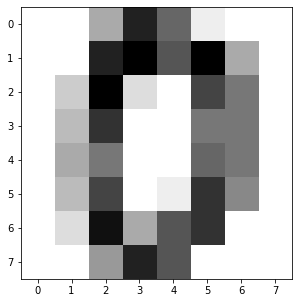

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [12]:
plt.figure(figsize=(5,5))
plt.imshow(digit.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()
print(digit.data[0]) # 화소값

### 유명인의 얼굴 데이터

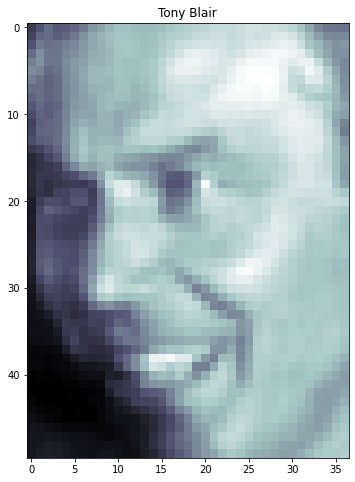

In [13]:
lfw = datasets.fetch_lfw_people(min_faces_per_person=40, resize=0.4) # 데이터가 너무 많으므로 한 사람당 얼굴 데이터 70개씩 가져오기
plt.figure(figsize=(8,8))
plt.imshow(lfw.images[0], cmap=plt.cm.bone) # 사람 얼굴일 경우 지정 파라미터
plt.title(lfw.target_names[lfw.target[0]]) # 사람 이름
plt.show()

#### 다섯 명만 출력해보기

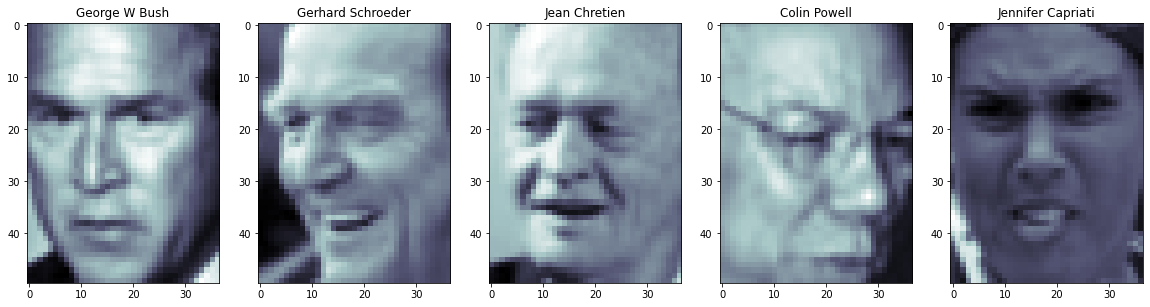

In [14]:
lfw = datasets.fetch_lfw_people(min_faces_per_person=40, resize=0.4) # 데이터가 너무 많으므로 한 사람당 얼굴 데이터 70개씩 가져오기
plt.figure(figsize=(20,5))

for i in range(10,15):
  plt.subplot(1,5,i%10+1)
  plt.imshow(lfw.images[i], cmap=plt.cm.bone) # 사람 얼굴일 경우 지정 파라미터
  plt.title(lfw.target_names[lfw.target[i]]) # 사람 이름
plt.show()

### news 데이터 - 순환 신경망을 이용해보기
- 웹에서 수집한 문서를 20개의 부류로 구분
- 텍스트로 구성되어 있어 각 샘플의 길이가 다르다.
- 뉴스에서 수집하는 정보는 시계열 데이터의 속성을 가지고 있다. (시계열 데이터 -> 순서 중요)

In [15]:
news = datasets.fetch_20newsgroups(subset='train')
# print(news.data[0])
# print(f'문서의 부류는 {news.target_names[news.target[0]]}')
print(news.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







# 데이터 수집 --> EDA(특징 추출) --> 모델링 --> 예측
### 머신러닝(기계 학습) - 높은 분별력을 가지는 특징을 사용해야 함

## SVC

In [16]:
# SVC
from sklearn import svm
digit = datasets.load_digits()

## SVC 모델 학습

In [17]:
s = svm.SVC(gamma=0.1, C=10)
s.fit(digit.data, digit.target)

SVC(C=10, gamma=0.1)

### 데이터 분류하지 않고 사용해보기

In [18]:
# 훈련데이터 임의 생성
new_d = [digit.data[0], digit.data[1], digit.data[2]]
predict = s.predict(new_d)
print(f'예측값 : {predict}\n')
print(f'실제값 : {digit.target[0], digit.target[1], digit.target[2]}')

예측값 : [0 1 2]

실제값 : (0, 1, 2)


### 정확도 검증 - score / r2score / mse

In [19]:
# 예측값
predict = s.predict(digit.data)

# 정확도 검증 (사이킷런 이용하지 않고 해보기)
correct = [i for i in range(len(predict)) if predict[i] == digit.target[i]]
# 예측한 i의 값과 실제 값의 i번째 값이 동일하면 출력
accuracy = len(correct) / len(predict)

print(f'화소 특징을 사용했을 때의 정확도 : {int(accuracy * 100)}%')
# 출력된 값, 즉 '예측값 = 실제값'의 조건을 충족한 개수와 전체의 개수가 동일하기 때문에 100% 출력된 것

화소 특징을 사용했을 때의 정확도 : 100%


### 객관적인 성능 측정의 필요성
#### 모델 선택의 기준
#### 실제 개발완료의 기준

#### **confusion matrix 혼동 행렬**

In [20]:
'''
부류가 2개인 경우

p : positive
n : negative

              그라운드   트루스(참값)
                긍정       부정
  예측 긍정      TP         FP
  예측 부정      FN         TN
'''

# 이진 분류의 예.... 환자 정성 / 불량품 양품
# TP / FP, FN / TN

'\n부류가 2개인 경우\n\np : positive\nn : negative\n\n              그라운드   트루스(참값)\n                긍정       부정\n  예측 긍정      TP         FP\n  예측 부정      FN         TN\n'

* **accuracy** : 부류가 불균형일 때 성능을 제대로 반영하지 못함 (맞힌 샘플수  / 전체 샘플수), (대각선 샘플수 / 전체 샘플수)

* **specificity(특이도)**, **sensitivity(민감도)** --> 의료에서 주로 사용
  * 특이도 TN / TN + FP --> 부정으로 예상 후 부정으로 맞힘, 긍정으로 예상 후 부정으로 예상을 빗나감. 결국 모두 부정
  * 민감도 TP / TP + FN

* **precision(정밀도)**와 **recal(재현율)** --> 정보 검색에 주로 사용
  * 정밀도 TP / TP + FP
  * 재현율 TP / TP + FN



### 이때까지 모델 선택 미포함, 훈련/테스트 집합으로 나누어 모델 훈련
##### (특정 목적 없이 단순히 여러 모델을 사용해보기 위함이었음)

### 모델 선택 포함, 푼련/검증/테스트 집합으로 나누어 모델 훈련

모델 미선택

In [21]:
# 필기체 데이터를 분할
from sklearn import svm
from sklearn.model_selection import train_test_split
x_train, x_target, y_train, y_target = train_test_split(digit.data, digit.target, test_size=0.2, random_state=42)

In [22]:
s = svm.SVC(gamma=0.001)
s.fit(x_train, y_train)
predict = s.predict(x_target)

In [23]:
# 혼동 행렬
conf = np.zeros((10,10))

In [32]:
conf = np.zeros((10,10)) # 실행할 때마다 초기화
                         # or 값이 누적됨
for i in range(len(predict)):
  conf[predict[i]][y_target[i]] += 1
print(conf)

[[33.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 28.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 33.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 33.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 46.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0. 46.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. 35.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 33.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 30.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0. 39.]]


In [31]:
print(predict[:10])
print(y_target[:10])

# 정답이면 대각선에 표시됨
# 그 외에는 정답과 예측이 다를 때 카운트 됨

[6 9 3 7 2 1 5 2 5 2]
[6 9 3 7 2 1 5 2 5 2]


정확도

In [25]:
no_correct = 0

# confusion matrix 의 대각선의 합
for i in range(10):
  no_correct += conf[i][i]

# 정확도 (대각선 샘플수 / 전체 샘플수)
accuracy = no_correct / len(predict)

print(f'테스트 집합에 대한 정확도 : {accuracy*100:.2f}%')

테스트 집합에 대한 정확도 : 98.89%


In [26]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(predict, y_target)
print(f'테스트 집합에 대한 정확도 : {accuracy*100:.2f}%')

테스트 집합에 대한 정확도 : 98.89%


문제점 : 난수를 사용하기 때문에 위 정확도는 실행 시 마다 다른 결과가 발생한다.

**난수를 고정시키자.**


### 교차검증

In [35]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(s, digit.data, digit.target, cv=5)
print(f'정확도(평균) : {accuracies.mean()*100:.2f}%    표준편차 : {accuracies.std()}')

정확도(평균) : 97.22%    표준편차 : 0.015013488295959767


## 분류기 중 성능이 가장 좋다는 서포트 벡터 머신을 이용하여 모델을 학습하고, 교차검증을 통해 평균적인 모델의 성능을 확인해보았다.

## 수동으로 정확도를 연산한 값이나 accuracy_score 도구를 통한 정확도 값이 매번 달라지기 때문에 교차검증을 통해 **평균 검증 정확도 값**을 구해본 것이다.